In [1]:
import pandas as pd
import numpy as np
import datetime
import sys
import os
import pickle
from libpysal import weights
import networkx as nx
from shapely.geometry import LineString

%matplotlib inline
import matplotlib.pyplot as plt

parentdir = os.path.dirname(os.getcwd())
sys.path.insert(0, parentdir)
import KeyFunctions as kf

root_path = "D:/GeoData/"
Main_CRS = "EPSG:27700"

In [2]:
name = "StPauls" 
gdf = kf.load_obj(root_path,"raw_gdf_" + name)

In [3]:
#Get the LSOA Boundaries and Road Linestrings
LSOA = gdf.loc[gdf["Type"]=="LSOA",:]
roads = gdf.loc[gdf["Type"]=="Road",:]

In [4]:
#Make our Graph network
G, positions = kf.create_network_from_shapes(LSOA)

c:\Users\richa\Anaconda3\envs\GeoData\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 2 disconnected components.
  warnings.warn(message)


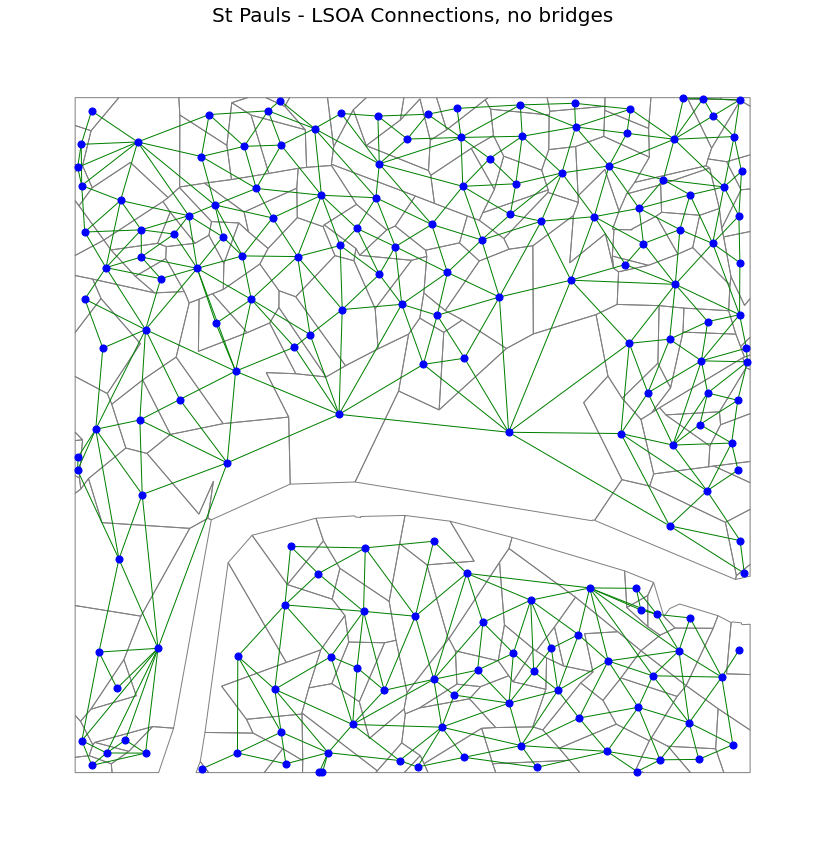

In [5]:
#Plot the LSOAs and the neighbourbours network
fig, ax = plt.subplots(1, figsize=(15, 15))
plt.axis("off")
ax.set_title("St Pauls - LSOA Connections, no bridges", size=20)
LSOA.plot(ax=ax, edgecolor='grey', color='none', linewidth=1)
nx.draw(G, positions, node_color='blue', node_size=50, edge_color='green', ax=ax)

In [6]:
#Extract the bridges and add them to the network
bridges = roads[~roads.geometry.within(LSOA.geometry.unary_union)]
bridges = bridges[bridges.geometry.type == 'LineString'].reset_index(drop=True)

#only want the lines that start and end in a different LSOA
for b in bridges.geometry.boundary:
    start, end = b.geoms
    st_nm = LSOA.loc[LSOA.geometry.contains(start), "Name"].to_list()
    ed_nm = LSOA.loc[LSOA.geometry.contains(end), "Name"].to_list()
    if st_nm != [] and ed_nm != [] and st_nm != ed_nm:
        G.add_edge(st_nm[0], ed_nm[0])


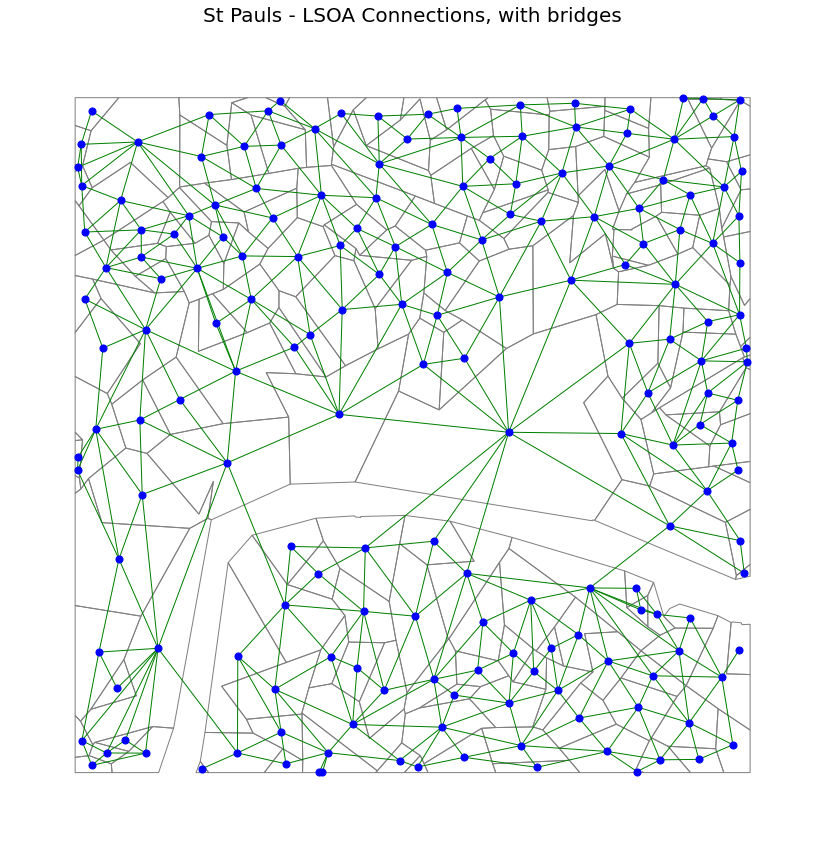

In [7]:
fig, ax = plt.subplots(1, figsize=(15, 15))
plt.axis("off")
ax.set_title("St Pauls - LSOA Connections, with bridges", size=20)
LSOA.plot(ax=ax, edgecolor='grey', color='none', linewidth=1)
nx.draw(G, positions, node_color='blue', node_size=50, edge_color='green', ax=ax)

Some of the working steps to make some useful maps for the blog post

In [8]:
#Get the lines outside of the map and drop the points
LSOA = gdf.loc[gdf["Type"]=="LSOA",:]
roads = gdf.loc[gdf["Type"]=="Road",:]
bridges0 = roads[~roads.geometry.within(LSOA.geometry.unary_union)]
bridges = bridges0[bridges0.geometry.type == 'LineString'].reset_index(drop=True)

# for b in bridges.geometry.geoms:
#     start,end = b.boundary

#only want the lines that start and end in a different LSOA
bridge_ends = bridges.geometry.boundary

br_keep = []
br_names = []
for b in bridge_ends:
    start, end = b.geoms
    st_nm = LSOA.loc[LSOA.geometry.contains(start), "Name"].to_list()
    ed_nm = LSOA.loc[LSOA.geometry.contains(end), "Name"].to_list()
    if st_nm != [] and ed_nm != [] and st_nm != ed_nm:
        br_keep = br_keep + [True]
    else:
        br_keep = br_keep + [False]

bridges = bridges[br_keep]

<AxesSubplot:>

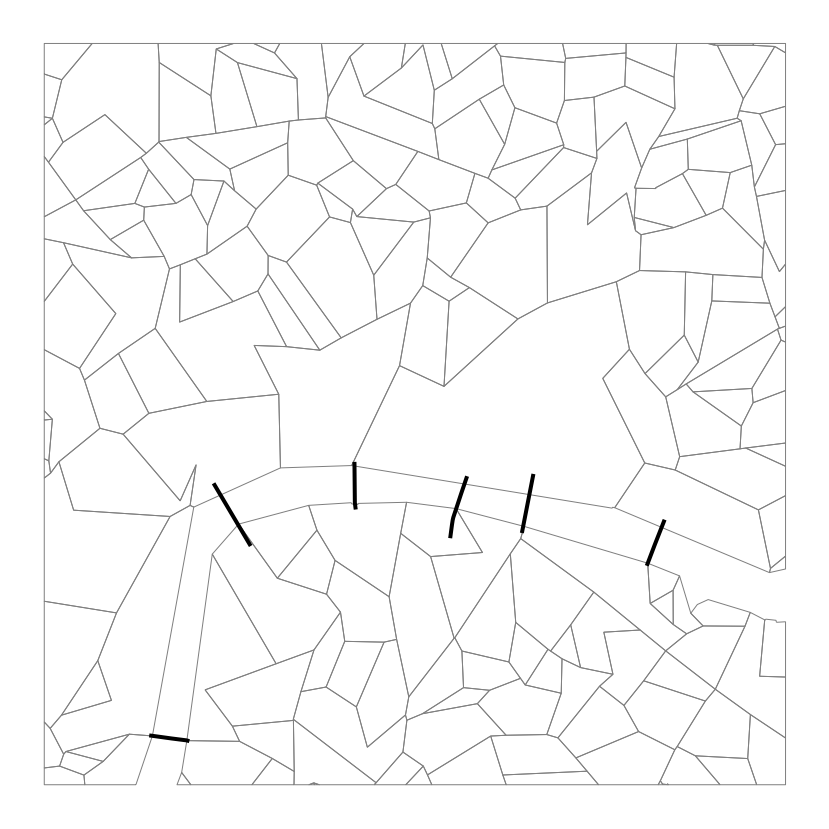

In [9]:
fig, ax = plt.subplots(1, figsize=(15, 15))
plt.axis("off")
LSOA.plot(ax=ax, edgecolor='grey', color='none', linewidth=1)
bridges.plot(ax=ax, color='black', linewidth=4)

<AxesSubplot:>

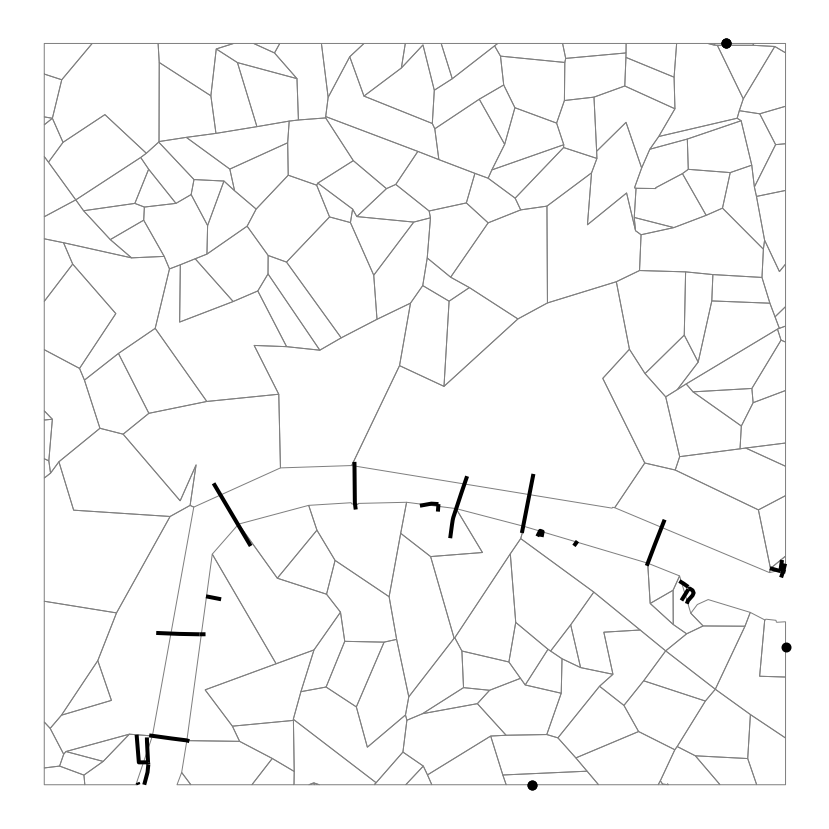

In [10]:
fig, ax = plt.subplots(1, figsize=(15, 15))
plt.axis("off")
LSOA.plot(ax=ax, edgecolor='grey', color='none', linewidth=1)
bridges0.plot(ax=ax, color='black', linewidth=4)

<AxesSubplot:>

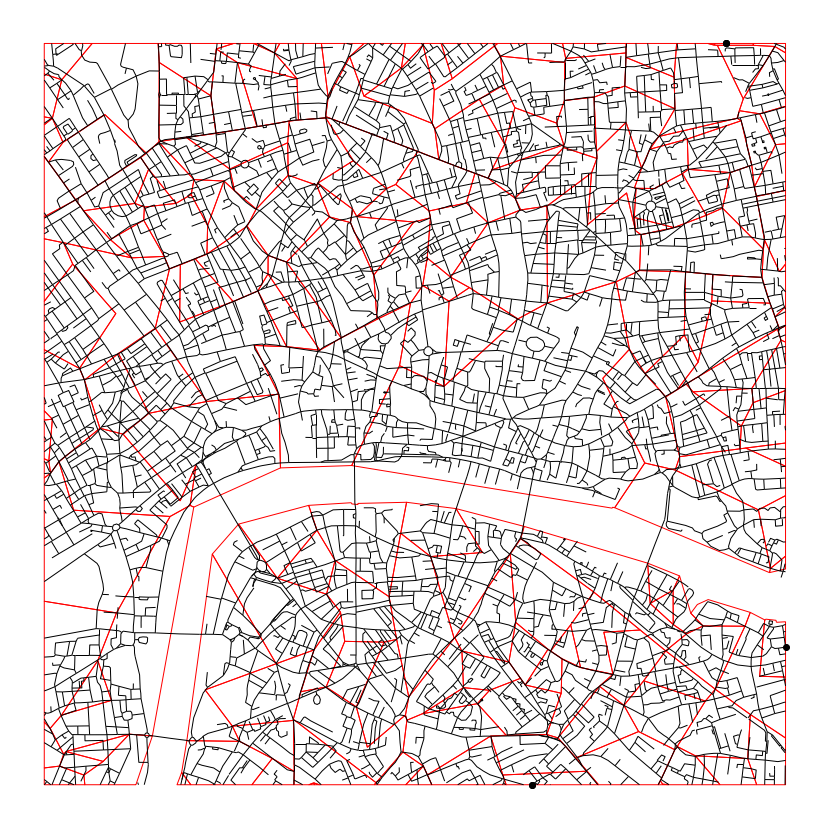

In [11]:
fig, ax = plt.subplots(1, figsize=(15, 15))
plt.axis("off")
LSOA.plot(ax=ax, edgecolor='red', color='none', linewidth=1)
roads.plot(ax=ax, color='black', linewidth=1)

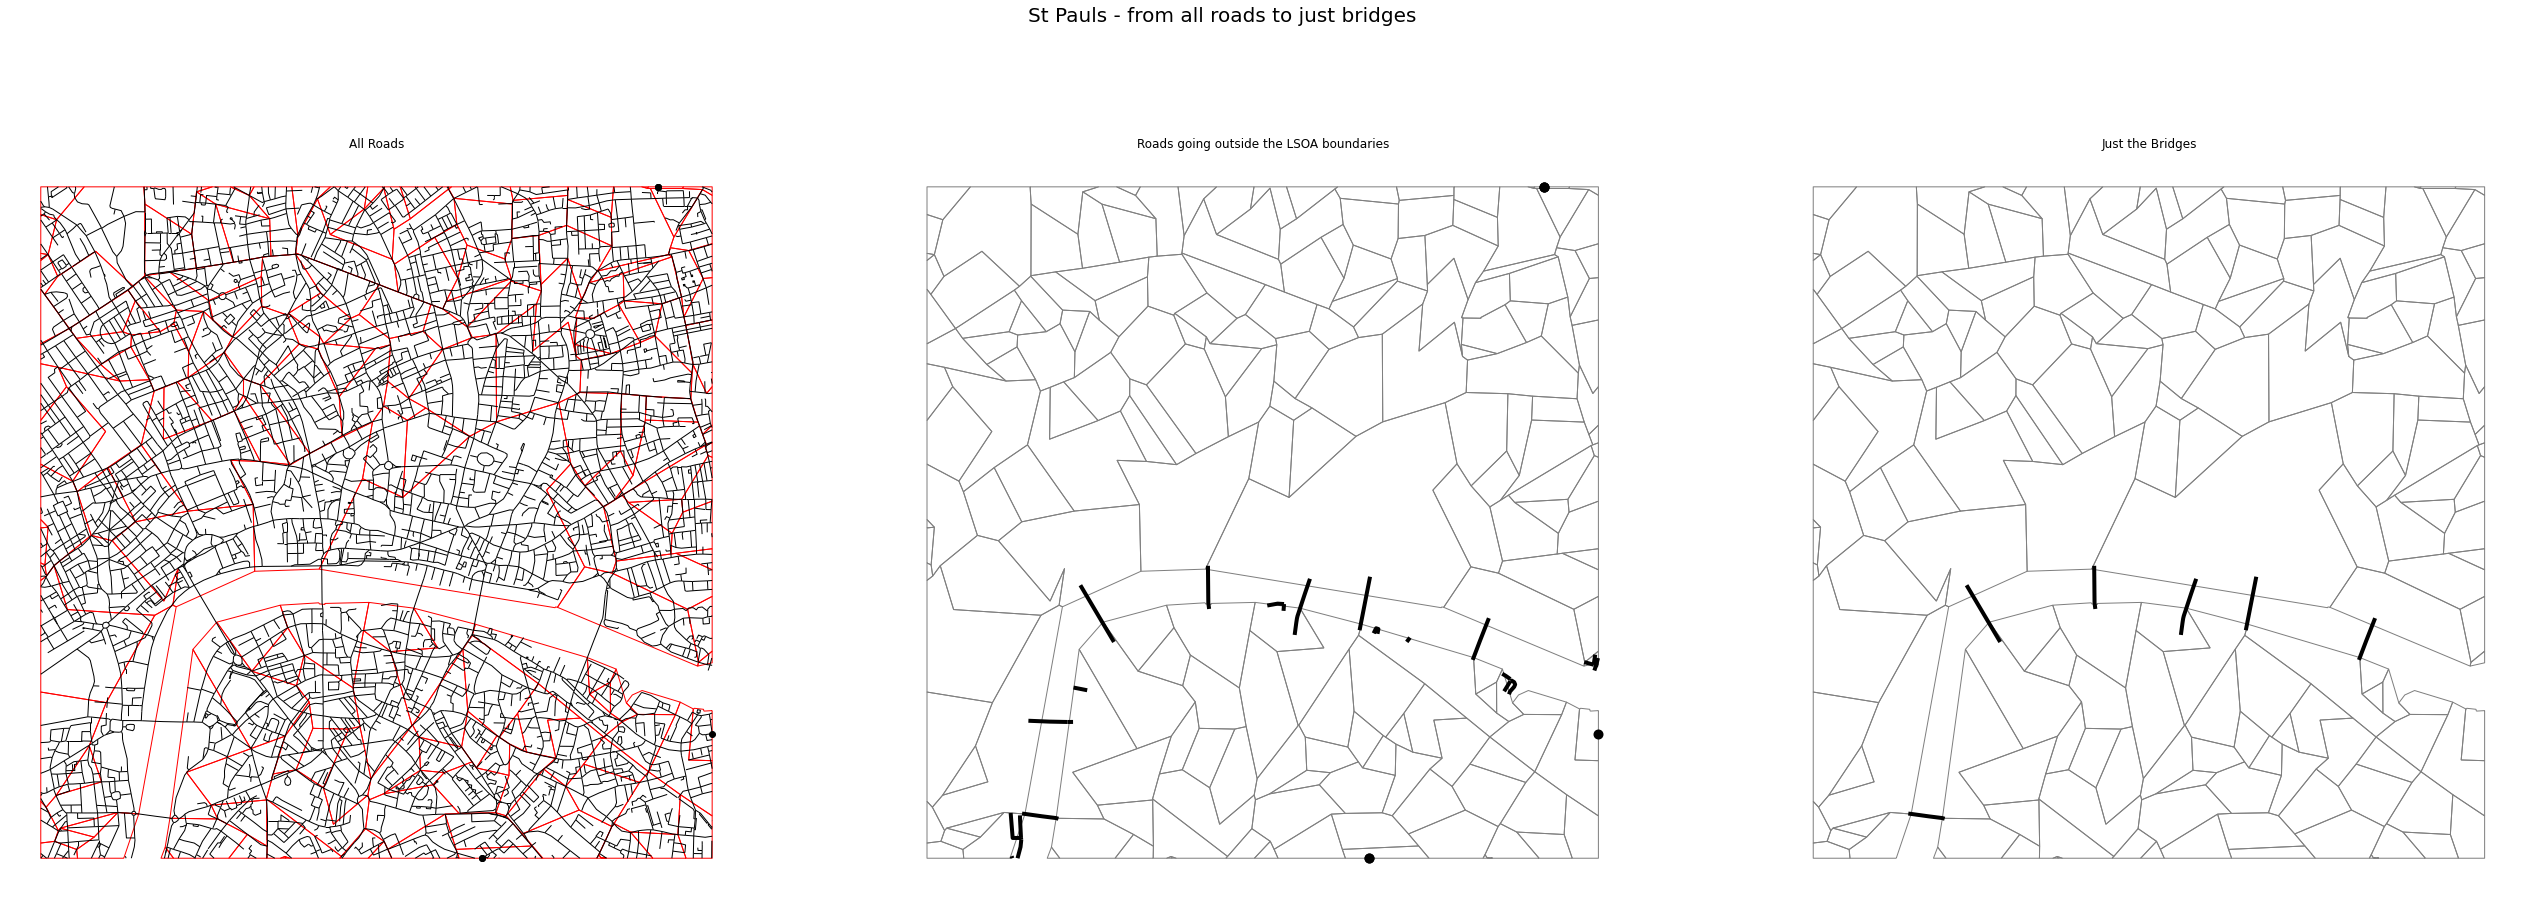

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(45, 15))
fig.suptitle("St Pauls - from all roads to just bridges", fontsize=20)

for i, facet in enumerate(ax):
    facet.set_title(("All Roads", "Roads going outside the LSOA boundaries", "Just the Bridges")[i])
    facet.axis("off")

#Plot1
LSOA.plot(ax=ax[0], edgecolor='red', color='none', linewidth=1)
roads.plot(ax=ax[0], color='black', linewidth=1)

#Plot2 - just the network
LSOA.plot(ax=ax[1], edgecolor='grey', color='none', linewidth=1)
bridges0.plot(ax=ax[1], color='black', linewidth=4)

#Plot 3 - combined network and graph
LSOA.plot(ax=ax[2], edgecolor='grey', color='none', linewidth=1)
bridges.plot(ax=ax[2], color='black', linewidth=4)
plt.show()